In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import bigrams
import itertools
from collections import Counter
import graphlab
from graphlab import SFrame
import matplotlib.pyplot as plt
from scipy import stats, polyfit, polyval
from scipy.stats.stats import pearsonr  
plt.style.use('ggplot')



### Importing the data sets as pandas objects:


In [3]:
df_train = pd.read_csv('puzzle_train_dataset.csv',sep=',')
df_test = pd.read_csv('puzzle_test_dataset.csv',sep=',')


### Taking a look at the training dataframe (df_train):

In [4]:
df_train

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,...,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,...,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,...,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,...,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0
5,b84024d8-a5ba-6c59-9133-1335c4a0a57d,False,1Rk8w4Ucd5yR3KcqZzLdow==,rJZgTmANW3PjOCQLCcp4iQ==,340.0,98.869235,0.424989,101.056327,0.22,8007.11,...,1DpYl6dtzY0qE33poow3iw==,ql9Tq+WRLqXnyVdZkMRgnQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiEHNX...,n+xK9CfX0bCn77lClTWviw==,13.0,0.0,0.0,16.0,16.0
6,8a66ed52-97b1-967f-132c-a5035c130d74,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,450.0,96.426992,0.396868,92.619158,0.42,10072.16,...,/EoxQEzy1PWWTtv6DNwr2w==,x0KGDyHi4nXvY76G2LpP9w==,NCqL3QBx0pscDnx3ixKwXg==,NaN,N5/CE7lSkAfB04hVFFwllw==,55.0,0.0,0.0,10.0,10.0
7,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,False,smzX0nxh5QlePvtVf6EAeg==,bopP0NxW3+r8tn9xIHTaOw==,450.0,97.793970,0.213243,82.377156,0.42,16016.97,...,kfFcVGcsJmH2n3eYprLkeQ==,HNyKljS/K9o5oFX7N88Yaw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,17.0,0.0,0.0,13.0,13.0
8,63ada984-e40a-85f5-1cef-c708be59ef93,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,390.0,100.118853,0.123257,83.718723,0.36,11517.24,...,BB/zpwTH+8GCIVHlhzOU1Q==,qf2kzehI0938fu9lrNoQvw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,49.0,0.0,0.0,6.0,6.0
9,08efdf0f-f8f1-b968-3452-6b634eabf43f,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,280.0,95.399016,0.592517,101.661396,0.24,11539.08,...,BB/zpwTH+8GCIVHlhzOU1Q==,exaXk+hI3vMFsjz87ctTUg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,43.0,0.0,0.0,19.0,19.0


#Measuring the size of the dataset:

In [5]:
len(df_train)

64592

### Checking the "type" of the "NaN"'s that are shown:

In [6]:
df_train['default'][14]

nan

In [7]:
type(df_train['default'][14])

float

In [8]:
df_train['n_issues'][1]

nan

In [9]:
type(df_train['n_issues'][1])

numpy.float64

### Extracting a random sample of the df_train dataframe, just to take a (less biased) look:

In [10]:
df_train.sample(10,random_state=20)

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
36605,03033a78-eaf4-93cd-18e8-98afe1f45de4,True,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,410.0,99.622865,0.939607,100.965010,0.24,35011.82,...,1DpYl6dtzY0qE33poow3iw==,o1cb+1CwliT0pnMihdizEw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,38.0,38.0
11658,17de4985-cb9a-a0d4-983b-efc719e7c69e,True,e4NYDor1NOw6XKGE60AWFw==,w1miZqhB5+RSamEQJa0rqg==,230.0,101.832689,0.267996,104.343646,0.53,4435.61,...,0gQEZgRHqS5KSF3oWQrQfw==,cLXzGTeZL5vBdQfHQ1MHtw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,6.0,6.0
57560,8702f819-38dc-015e-5f95-4d8674dece04,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,370.0,98.391301,0.569890,103.314281,0.18,9464.01,...,0lQuvmygO68ZFXZjzHEOww==,LDqH94ji8KhBsmaceDPr/Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,16.0,0.0,0.0,14.0,14.0
34198,9c02e2b3-c382-8326-4e96-73daefb71bb3,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,180.0,97.133317,0.961470,98.860339,0.24,6016.28,...,xsd3ZdsI3356I3xMxZeiqQ==,IkavYIMybwGTChPpS3dJ6Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,nSpvDsIsslUaX6GE6m6eQA==,NaN,0.0,0.0,11.0,NaN
29070,7ffa0226-27c9-9c69-6f07-688ab28b6480,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,280.0,100.109662,0.298416,121.481635,0.29,8036.78,...,1vMmtGURgMcjxQbV2KQiUw==,xKFbYDl5iprg13oyD/ZSUA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,11.0,0.0,0.0,4.0,4.0
4561,df9e42d5-43c2-8f63-a0f4-26d71284d15f,False,e4NYDor1NOw6XKGE60AWFw==,NLvAOzzmJba/0zolQnWF5Q==,210.0,96.169379,0.758741,83.439523,0.32,4010.60,...,/EoxQEzy1PWWTtv6DNwr2w==,6whtNflYvJaZ3X9vrD+jBQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,3.0,NaN
13441,64450929-77a6-fb59-956b-f149ed875eef,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,280.0,100.587780,0.301078,88.264481,0.41,10017.66,...,1DpYl6dtzY0qE33poow3iw==,IvtRWE7TLKqrAj9T90HrUg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,5.0,5.0
28427,a9905fd1-c20e-35d5-c46d-2f086ed1f172,False,smzX0nxh5QlePvtVf6EAeg==,bopP0NxW3+r8tn9xIHTaOw==,300.0,102.832785,0.527131,88.159368,0.40,18256.44,...,fR2lwAMjCb/fNXjsApiOTw==,L97rCsCE5APLgqnZGwSOAg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,72.0,0.0,0.0,6.0,6.0
23279,93891ae9-71e6-9d7e-b7fb-66bcce3fa456,True,1Rk8w4Ucd5yR3KcqZzLdow==,rJZgTmANW3PjOCQLCcp4iQ==,260.0,95.688111,0.257816,114.270185,0.17,2417.43,...,7bX4XFXmYqoMspxup0CrKA==,qHANjdHx2y8lMMpROPif+Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,25.0,0.0,0.0,4.0,NaN
61681,2c4d3068-1d09-8a8e-749e-b7995b868bd2,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,390.0,99.763733,0.546994,93.006902,0.21,18761.54,...,BB/zpwTH+8GCIVHlhzOU1Q==,Ct6bsa/fNtYGJTNxluEWAA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,16.0,NaN


### Collecting all columns headers:

In [11]:
list_columns = list(df_train.columns)
print list_columns

['ids', 'default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'reason', 'income', 'sign', 'gender', 'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues']


In [12]:
list_columns.index('score_6')

7

### Exploring a column:

In [13]:
df_train['borrowed_in_months'].sample(15,random_state=5)

35699    60.0
21299    60.0
43595    36.0
4279     36.0
23881    36.0
38935    60.0
58043    36.0
51545    36.0
19513    36.0
29180    36.0
58590     NaN
19107    60.0
47803    36.0
36314    60.0
11743    60.0
Name: borrowed_in_months, dtype: float64

### Exploring all not shown columns  and its data type:

In [14]:
for i in xrange(list_columns.index('borrowed_in_months'),list_columns.index('state')):
    print list_columns[i]
    print df_train[list_columns[i]].sample(15,random_state=5)
    print ' '
    print type(df_train[list_columns[i]][0])
    print ' '
    print ' '
    print ' '

borrowed_in_months
35699    60.0
21299    60.0
43595    36.0
4279     36.0
23881    36.0
38935    60.0
58043    36.0
51545    36.0
19513    36.0
29180    36.0
58590     NaN
19107    60.0
47803    36.0
36314    60.0
11743    60.0
Name: borrowed_in_months, dtype: float64
 
<type 'numpy.float64'>
 
 
 
credit_limit
35699         NaN
21299         0.0
43595     11299.0
4279          0.0
23881         0.0
38935         NaN
58043     38183.0
51545    145525.0
19513     88049.0
29180         0.0
58590         NaN
19107         0.0
47803     69508.0
36314         NaN
11743         NaN
Name: credit_limit, dtype: float64
 
<type 'numpy.float64'>
 
 
 
reason
35699    mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...
21299    mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...
43595    mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...
4279     mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...
23881    mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...
38935    mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRch

### Identifying all string and boolean (FB profile) columns that matters:

In [15]:
str_columns = []
for i in xrange(list_columns.index('score_1'),list_columns.index('n_issues')+1):
    if type(df_train[list_columns[i]][0]) == str or type(df_train[list_columns[i]][0]) == bool:
        print list_columns[i], ' ', type(df_train[list_columns[i]][0])
        str_columns.append(list_columns[i])
        


score_1   <type 'str'>
score_2   <type 'str'>
reason   <type 'str'>
sign   <type 'str'>
gender   <type 'str'>
facebook_profile   <type 'bool'>
last_payment   <type 'str'>
end_last_loan   <type 'str'>
state   <type 'str'>
zip   <type 'str'>
channel   <type 'str'>
job_name   <type 'str'>
real_state   <type 'str'>


In [16]:
print str_columns

['score_1', 'score_2', 'reason', 'sign', 'gender', 'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip', 'channel', 'job_name', 'real_state']


### Finally dropping the string and boolean columns that will not be used as "feature" in this first approach:

In [17]:
df_train_num = df_train.drop(str_columns,axis=1)

In [18]:
df_train_num

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,NaN,46016.31,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,NaN,48025.47,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,NaN,46011.12,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0
5,b84024d8-a5ba-6c59-9133-1335c4a0a57d,False,340.0,98.869235,0.424989,101.056327,0.22,8007.11,36.0,NaN,43008.57,13.0,0.0,0.0,16.0,16.0
6,8a66ed52-97b1-967f-132c-a5035c130d74,False,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0
7,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,False,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0
8,63ada984-e40a-85f5-1cef-c708be59ef93,False,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0
9,08efdf0f-f8f1-b968-3452-6b634eabf43f,False,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0


#### A random check:

In [19]:
df_train_num.sample(15,random_state=5)

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
35699,8630f07e-24f9-ea61-167a-66110fdff78f,False,330.0,89.742696,0.754614,101.025918,0.28,35025.37,60.0,NaN,90016.78,NaN,0.0,0.0,6.0,NaN
21299,fbaa290f-b9ca-87e8-baf1-ae5cdb2e5a4a,True,260.0,96.599613,0.857792,109.589020,0.48,14022.93,60.0,0.0,61025.32,NaN,0.0,0.0,6.0,6.0
43595,1a013323-6cb6-c601-9111-2a794d2b02ff,False,430.0,101.508759,0.667703,98.274524,0.27,8484.54,36.0,11299.0,25017.28,NaN,0.0,0.0,10.0,10.0
4279,f8df8760-b8a7-ec1a-e163-14c92dadd2f7,False,470.0,98.359093,0.324127,113.462376,0.23,20022.69,36.0,0.0,120026.14,33.0,0.0,0.0,16.0,16.0
23881,17568e6f-b34f-3530-a8e1-1d8182e5c4f8,False,250.0,99.651487,0.179869,122.912760,0.28,11344.50,36.0,0.0,34023.26,NaN,0.0,0.0,5.0,5.0
38935,f125e333-ed5e-308c-de2f-93998ed140b2,False,510.0,102.941047,0.289876,100.562240,0.41,17014.68,60.0,NaN,72022.11,NaN,0.0,0.0,12.0,NaN
58043,420cfafa-db64-26e0-297b-b2f9f62cdcb8,False,350.0,100.545042,0.933325,94.019041,0.21,16036.26,36.0,38183.0,60013.30,NaN,0.0,0.0,12.0,12.0
51545,f5726297-5af3-34e1-beb1-316a1abbd46a,False,250.0,105.983012,0.510718,117.507597,0.44,18029.39,36.0,145525.0,175030.82,58.0,0.0,0.0,20.0,20.0
19513,805793a9-a388-32b3-a1f8-a2356ff3dcdf,False,400.0,99.302317,0.161558,100.751341,0.21,23052.81,36.0,88049.0,140025.52,NaN,0.0,0.0,10.0,10.0
29180,9873c4ed-e09f-12fe-0ae5-47d4e91a49d3,False,200.0,100.835302,0.173320,107.208135,0.28,32016.74,36.0,0.0,120016.52,9.0,0.0,1.0,5.0,5.0


In [20]:
list_columns_num = list(df_train_num.columns)
print list_columns_num

['ids', 'default', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues']


### Depending on the choice of the model features (we will perform several tests to follow), we can drop items that shows NaN entries. For example:

In [21]:
df_train_num_clean_default_nissues = df_train_num.dropna(axis=0,subset=['default','n_issues'])


#### (The line above drops all items where column 'default' and 'n_issues' shows a NaN entry)

In [22]:
df_train_num_clean_default_nissues

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0
4,e643bf65-9288-92f2-df13-eed631fe237c,False,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0
5,b84024d8-a5ba-6c59-9133-1335c4a0a57d,False,340.0,98.869235,0.424989,101.056327,0.22,8007.11,36.0,NaN,43008.57,13.0,0.0,0.0,16.0,16.0
6,8a66ed52-97b1-967f-132c-a5035c130d74,False,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0
7,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,False,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0
8,63ada984-e40a-85f5-1cef-c708be59ef93,False,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0
9,08efdf0f-f8f1-b968-3452-6b634eabf43f,False,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0
10,acbb594c-fdfa-feee-5a57-a21f077bff9b,True,250.0,95.755391,0.555542,98.947427,0.25,14036.89,36.0,9953.0,40013.13,16.0,0.0,0.0,8.0,8.0
11,0854e48f-3ad0-8ba0-0d3f-97c8d62b4ecd,False,300.0,102.841705,0.383545,90.581719,0.17,9020.12,36.0,25000.0,37018.58,NaN,0.0,0.0,15.0,15.0
12,8689dcdb-b305-280b-7e9b-ffd8e6a20dd0,False,120.0,97.394884,0.252639,89.942251,0.31,1418.09,36.0,0.0,50015.28,NaN,0.0,0.0,3.0,3.0


### Here we reindex the rows, just for convenience:

In [23]:
df_train_num_clean_default_nissues.reset_index(drop=True)

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0
1,e643bf65-9288-92f2-df13-eed631fe237c,False,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0
2,b84024d8-a5ba-6c59-9133-1335c4a0a57d,False,340.0,98.869235,0.424989,101.056327,0.22,8007.11,36.0,NaN,43008.57,13.0,0.0,0.0,16.0,16.0
3,8a66ed52-97b1-967f-132c-a5035c130d74,False,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0
4,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,False,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0
5,63ada984-e40a-85f5-1cef-c708be59ef93,False,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0
6,08efdf0f-f8f1-b968-3452-6b634eabf43f,False,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0
7,acbb594c-fdfa-feee-5a57-a21f077bff9b,True,250.0,95.755391,0.555542,98.947427,0.25,14036.89,36.0,9953.0,40013.13,16.0,0.0,0.0,8.0,8.0
8,0854e48f-3ad0-8ba0-0d3f-97c8d62b4ecd,False,300.0,102.841705,0.383545,90.581719,0.17,9020.12,36.0,25000.0,37018.58,NaN,0.0,0.0,15.0,15.0
9,8689dcdb-b305-280b-7e9b-ffd8e6a20dd0,False,120.0,97.394884,0.252639,89.942251,0.31,1418.09,36.0,0.0,50015.28,NaN,0.0,0.0,3.0,3.0


In [24]:
len(df_train_num_clean_default_nissues)

44386

### The original df_train_num data frame is preserved, so we can work with it.

In [25]:
df_train_num

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,NaN,46016.31,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,NaN,48025.47,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,NaN,46011.12,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0
5,b84024d8-a5ba-6c59-9133-1335c4a0a57d,False,340.0,98.869235,0.424989,101.056327,0.22,8007.11,36.0,NaN,43008.57,13.0,0.0,0.0,16.0,16.0
6,8a66ed52-97b1-967f-132c-a5035c130d74,False,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0
7,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,False,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0
8,63ada984-e40a-85f5-1cef-c708be59ef93,False,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0
9,08efdf0f-f8f1-b968-3452-6b634eabf43f,False,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0


### Also,  we can consider a completely NaN free dataset:

In [26]:
df_train_num_allclean = df_train_num.dropna().reset_index(drop=True)

In [27]:
df_train_num_allclean

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0
1,e643bf65-9288-92f2-df13-eed631fe237c,False,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0
2,8a66ed52-97b1-967f-132c-a5035c130d74,False,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0
3,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,False,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0
4,63ada984-e40a-85f5-1cef-c708be59ef93,False,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0
5,08efdf0f-f8f1-b968-3452-6b634eabf43f,False,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0
6,acbb594c-fdfa-feee-5a57-a21f077bff9b,True,250.0,95.755391,0.555542,98.947427,0.25,14036.89,36.0,9953.0,40013.13,16.0,0.0,0.0,8.0,8.0
7,958fa2a9-6f85-bc5e-4eb2-999b74f34847,False,400.0,102.335198,0.300900,92.746026,0.52,35019.04,36.0,67091.0,95014.57,67.0,0.0,0.0,14.0,14.0
8,ff860c5e-3452-d752-daa2-582180a64802,True,240.0,101.381726,0.849653,90.293183,0.31,35017.06,36.0,41329.0,121020.48,39.0,0.0,0.0,10.0,10.0
9,26a68732-a660-8cf9-340d-34c88ecdcbf0,False,470.0,103.518605,0.082595,102.477202,0.25,18018.63,36.0,34819.0,64032.34,16.0,0.0,0.0,10.0,9.0


In [28]:
len(df_train_num_allclean)

18277

In [29]:
df_train_num_allclean.sample(15, random_state = 5)

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
2216,40c5b18e-8cbd-42f0-e71c-e2e9b061f80f,False,250.0,95.157541,0.130098,106.520901,0.27,8903.71,36.0,6772.0,37013.82,52.0,0.0,0.0,9.0,9.0
6447,127c390d-6982-4b1a-c2c9-3cce704a815a,True,210.0,101.227232,0.924792,106.595153,0.38,15015.08,60.0,4500.0,50028.31,24.0,0.0,0.0,6.0,6.0
8477,7f1fff50-96e5-c767-e194-284d38d7a0b9,False,310.0,100.808554,0.350000,100.942321,0.24,6441.33,36.0,44864.0,65032.69,10.0,0.0,0.0,13.0,13.0
10651,d26d3e79-008f-1a09-23b2-ca62a2d7d1d5,False,230.0,102.487106,0.703579,78.212628,0.18,15014.97,36.0,0.0,70024.57,8.0,0.0,0.0,17.0,17.0
11758,4c811982-8f1f-2e04-cb26-b9c67aa570bc,True,310.0,102.484787,0.629195,105.096645,0.30,21271.01,60.0,39596.0,62033.57,6.0,0.0,0.0,13.0,13.0
5280,ff036988-0899-ee2e-1297-b4086f257970,False,280.0,101.115358,0.026493,102.519384,0.24,10215.25,36.0,24364.0,70015.67,37.0,0.0,0.0,10.0,10.0
6095,5af51ac9-7243-f2e0-acb9-25fd765d729d,False,300.0,105.452073,0.861696,108.005821,0.30,20038.95,60.0,27439.0,56663.19,43.0,0.0,0.0,9.0,9.0
10948,e167f46c-dbd6-10ba-59f0-e8c59eba18ea,False,390.0,101.218688,0.323299,112.431763,0.39,10026.23,36.0,49702.0,85033.05,23.0,0.0,0.0,5.0,5.0
14132,efab010b-cb32-2d17-8637-e59b0cf3ee14,False,230.0,100.288681,0.474542,96.620301,0.26,10301.51,36.0,8910.0,50753.92,12.0,0.0,0.0,8.0,8.0
8282,8dacabec-fda7-380d-8a3a-c006735e18d1,False,370.0,98.653169,0.774751,95.566558,0.21,13386.32,36.0,25233.0,50021.21,10.0,0.0,0.0,12.0,12.0


### Converting boolean date in 'default' column to integer 0 or 1:

In [30]:
df_train_num_allclean['default'] = (df_train_num_allclean['default']).astype(int)

#### checking the dataframe:

In [31]:
df_train_num_allclean

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,0,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0
1,e643bf65-9288-92f2-df13-eed631fe237c,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0
2,8a66ed52-97b1-967f-132c-a5035c130d74,0,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0
3,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,0,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0
4,63ada984-e40a-85f5-1cef-c708be59ef93,0,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0
5,08efdf0f-f8f1-b968-3452-6b634eabf43f,0,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0
6,acbb594c-fdfa-feee-5a57-a21f077bff9b,1,250.0,95.755391,0.555542,98.947427,0.25,14036.89,36.0,9953.0,40013.13,16.0,0.0,0.0,8.0,8.0
7,958fa2a9-6f85-bc5e-4eb2-999b74f34847,0,400.0,102.335198,0.300900,92.746026,0.52,35019.04,36.0,67091.0,95014.57,67.0,0.0,0.0,14.0,14.0
8,ff860c5e-3452-d752-daa2-582180a64802,1,240.0,101.381726,0.849653,90.293183,0.31,35017.06,36.0,41329.0,121020.48,39.0,0.0,0.0,10.0,10.0
9,26a68732-a660-8cf9-340d-34c88ecdcbf0,0,470.0,103.518605,0.082595,102.477202,0.25,18018.63,36.0,34819.0,64032.34,16.0,0.0,0.0,10.0,9.0


### More exploratory analysis:

In [32]:
df_train_num_allclean[df_train_num_allclean['amount_borrowed']
                      ==df_train_num_allclean['amount_borrowed'].max()]

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
4922,4e63c946-2a11-18ab-5a2f-149fc39fa376,0,320.0,98.924323,0.057872,108.697422,0.46,35059.6,60.0,62672.0,144031.89,11.0,0.0,0.0,13.0,13.0


In [33]:
df_train_num_allclean[df_train_num_allclean['n_bankruptcies']
                      ==df_train_num_allclean['n_bankruptcies'].max()]

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
11329,0c3c0741-4af6-3b8f-d448-4274cbfbdcdb,1,180.0,94.748772,0.423440,106.437035,0.30,15012.81,60.0,0.0,38521.13,66.0,6.0,0.0,13.0,13.0
15525,51c48174-3fab-09f6-de16-5ce93ee72df6,0,250.0,96.146820,0.964964,85.180684,0.27,8055.63,36.0,0.0,85021.99,67.0,6.0,0.0,8.0,8.0


In [34]:
df_train_num_allclean[df_train_num_allclean['risk_rate']
                      ==df_train_num_allclean['risk_rate'].max()]

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
17991,511b50b9-17b2-6d10-876f-cde82e7dc167,0,190.0,97.788074,0.946395,96.606985,0.9,6028.51,36.0,0.0,45019.31,36.0,0.0,0.0,9.0,9.0


In [35]:
df_train_num_allclean[df_train_num_allclean['risk_rate']
                      ==df_train_num_allclean['risk_rate'].min()]

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
1869,6d398143-7f99-3403-3c4b-e5c1e4596df8,0,180.0,102.250367,0.185875,91.68605,0.03,12022.67,36.0,0.0,89014.09,25.0,0.0,0.0,8.0,8.0
4613,6b3d2a25-8618-14ad-2dde-2f3c9a117cf4,0,560.0,94.911405,0.452873,98.28813,0.03,20006.21,36.0,20233.0,88022.20,29.0,0.0,0.0,15.0,15.0


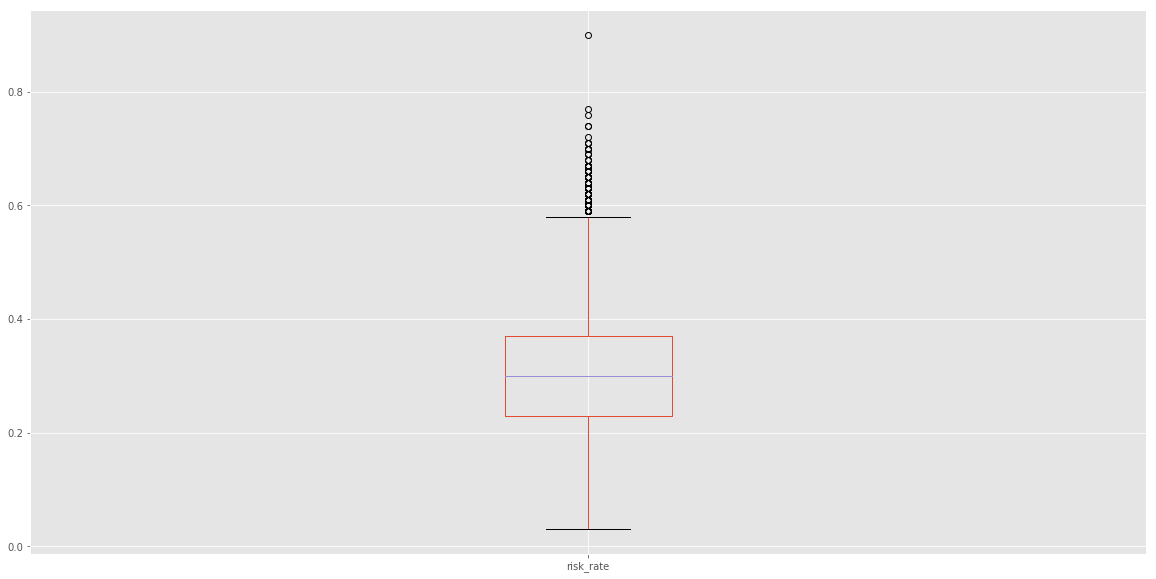

In [36]:
df_train_num_allclean['risk_rate'].plot.box(figsize=(20,10))

In [37]:
df_train_num_allclean['amount_borrowed'].describe()

count    18277.000000
mean     14018.832392
std       7973.362058
min       1005.920000
25%       8024.640000
50%      12026.000000
75%      19115.440000
max      35059.600000
Name: amount_borrowed, dtype: float64

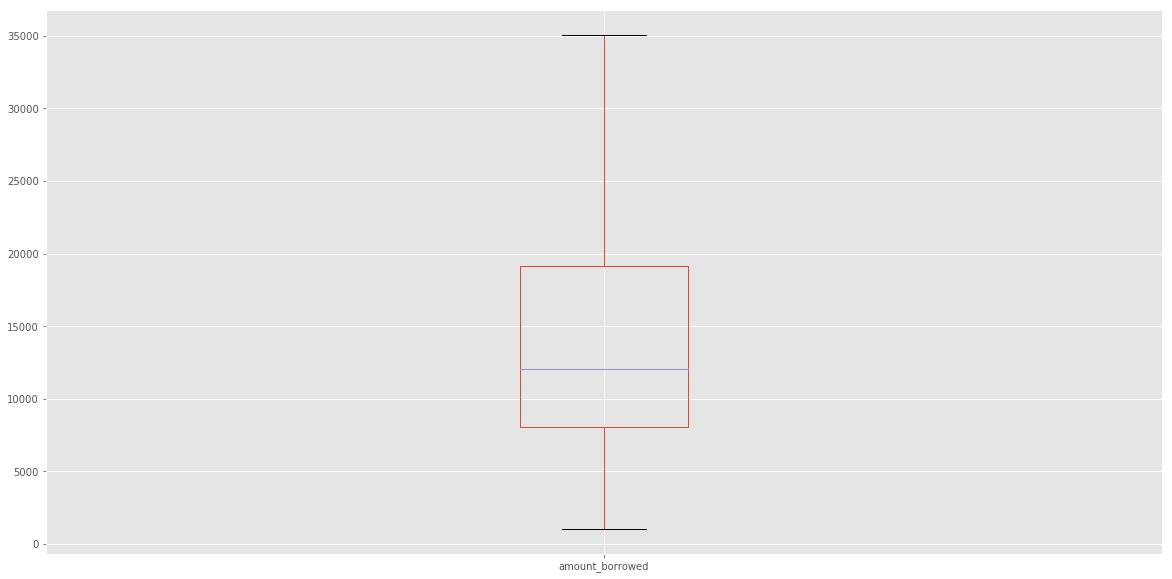

In [38]:
df_train_num_allclean['amount_borrowed'].plot.box(figsize=(20,10))

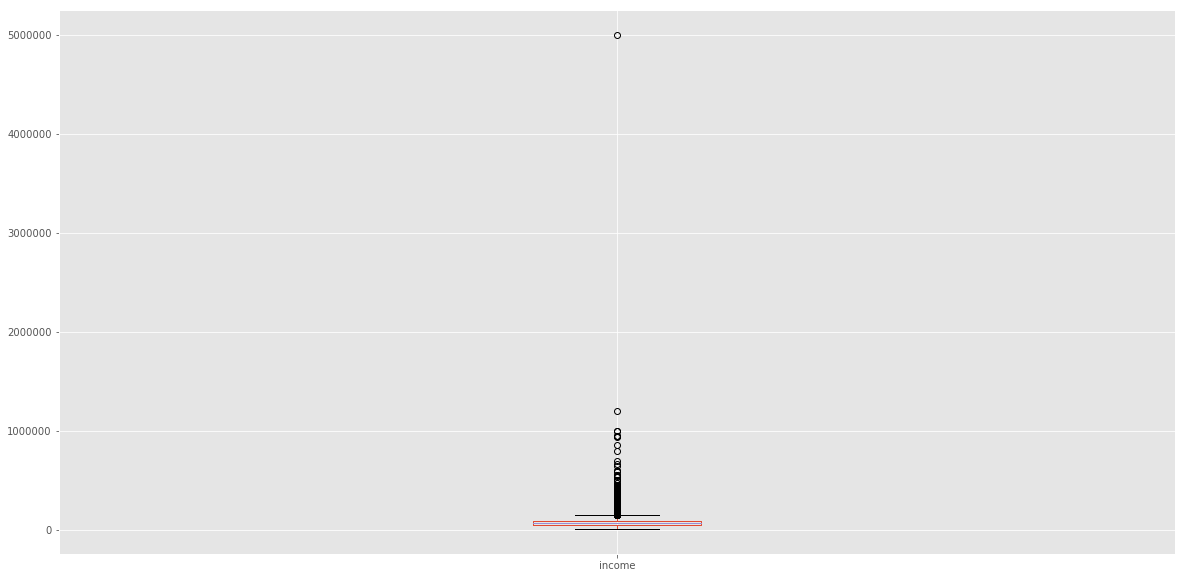

In [39]:
df_train_num_allclean['income'].plot.box(figsize=(20,10))

In [40]:
df_train_num_allclean[df_train_num_allclean['income']
                      ==df_train_num_allclean['income'].max()]

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
17984,805c584c-ba54-7d1e-6249-0208f47756c3,0,170.0,104.33856,0.161395,96.785556,0.3,35010.97,36.0,70492.0,5000027.83,12.0,0.0,0.0,13.0,13.0


In [41]:
df_train_num_allclean[df_train_num_allclean['income']
                      ==df_train_num_allclean['income'].min()]

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
9572,1ea54227-65cd-edce-b6b2-ca0ae8ec75b7,0,420.0,104.434394,0.344458,82.110569,0.22,2023.54,36.0,0.0,9140.36,17.0,0.0,0.0,9.0,9.0


### There is a huge outlier related to the 'income'. Let's define a new dataframe without the outlier just to analyze, for curiosity:

In [42]:
df_train_num_allclean_income_outlier = df_train_num_allclean[df_train_num_allclean['income']!=
                                                         df_train_num_allclean['income'].max()]

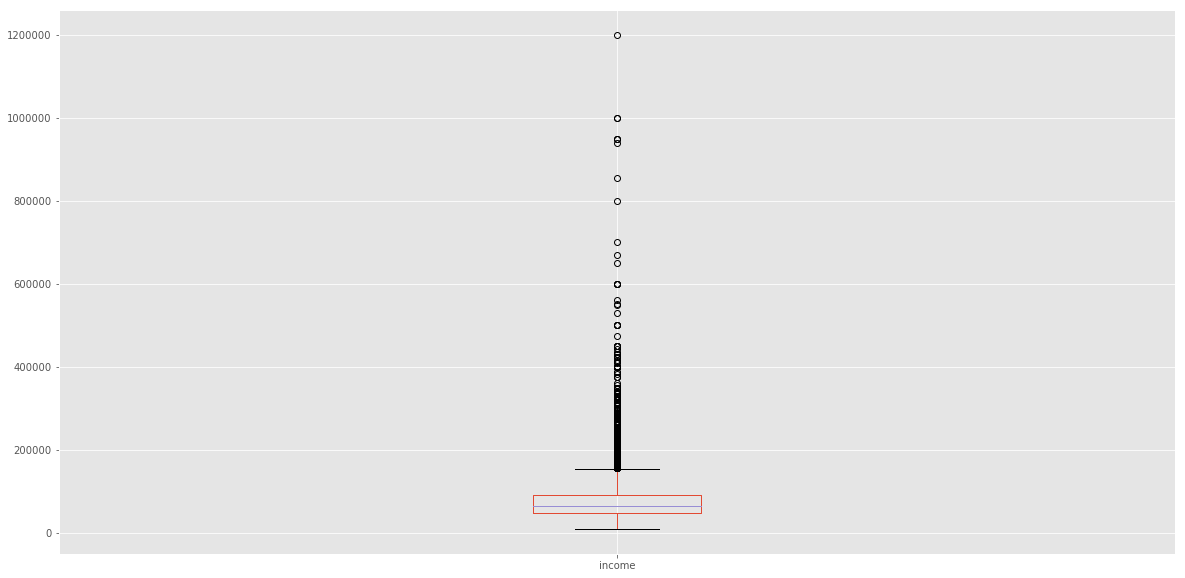

In [43]:
df_train_num_allclean_income_outlier['income'].plot.box(figsize=(20,10))

### let's look at the scatter plot income x credit_limit (for the dataset without the 'income' outlier):

In [44]:
income_list = list(df_train_num_allclean_income_outlier['income'])
creditlimit_list = list(df_train_num_allclean_income_outlier['credit_limit'])

In [45]:
income_list[0:10]

[59869.050000000003,
 90026.169999999998,
 39335.519999999997,
 98772.0,
 62014.400000000001,
 85022.960000000006,
 40013.129999999997,
 95014.570000000007,
 121020.48,
 64032.339999999997]

In [46]:
creditlimit_list[0:10]

[62386.0,
 32366.0,
 0.0,
 102018.0,
 0.0,
 82310.0,
 9953.0,
 67091.0,
 41329.0,
 34819.0]

In [47]:
(c1,c2)=polyfit(income_list,creditlimit_list,1)
yr=polyval([c1,c2],income_list)
yrlist = list(yr)

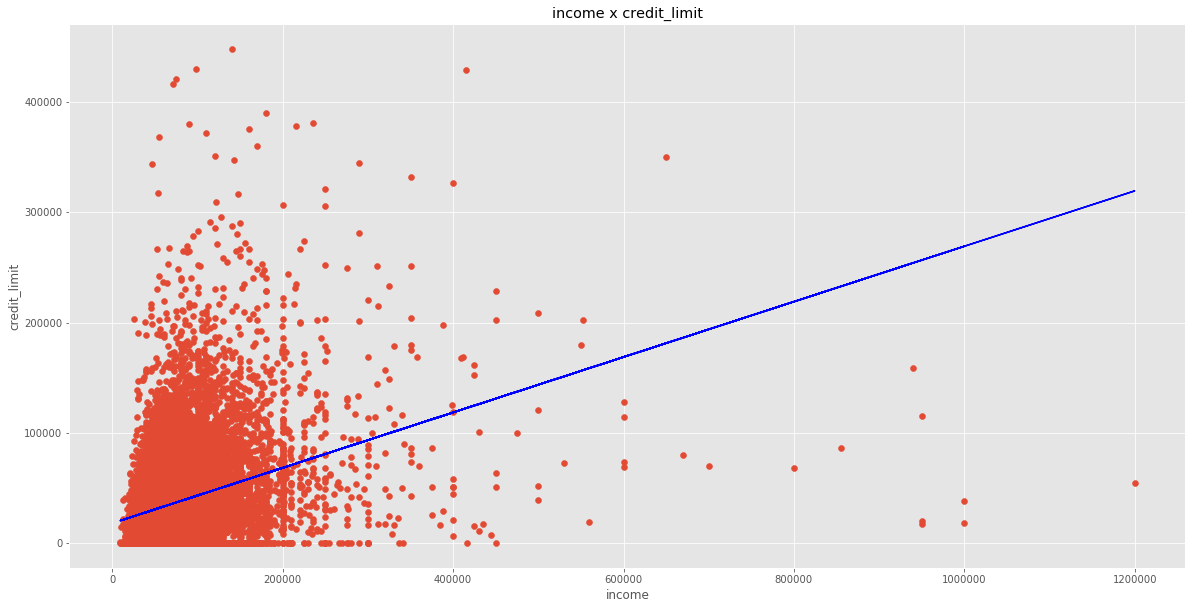

In [48]:
plt.figure(figsize=(20,10))
plt.scatter(income_list,creditlimit_list)
plt.plot(income_list,yrlist,'b')
plt.title('income x credit_limit')
plt.xlabel('income')
plt.ylabel('credit_limit')


In [49]:
pearsonr(income_list,creditlimit_list)

(0.32312581674606289, 0.0)

### let's look at the scatter plot income x risk_rate (for the dataset without the 'income' outlier):

In [50]:
riskrate_list = list(df_train_num_allclean_income_outlier['risk_rate'])

In [51]:
(c1,c2)=polyfit(income_list,riskrate_list,1)
yr=polyval([c1,c2],income_list)
yrlist = list(yr)

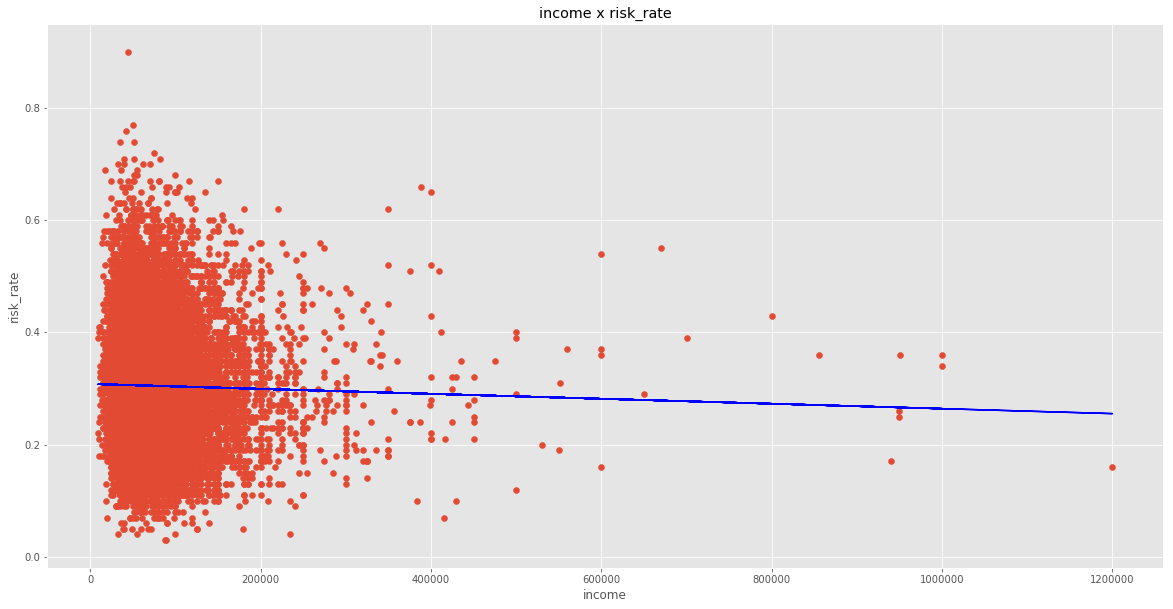

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(income_list,riskrate_list)
plt.plot(income_list,yrlist,'b')
plt.title('income x risk_rate')
plt.xlabel('income')
plt.ylabel('risk_rate')

In [53]:
pearsonr(income_list,riskrate_list)

(-0.02156446589733909, 0.0035521821633947106)

### let's look at the scatter plot credit_limit x amount_borrowed (for the dataset without the 'income' outlier):

In [54]:
amountborrowed_list = list(df_train_num_allclean_income_outlier['amount_borrowed'])

In [55]:
(c1,c2)=polyfit(creditlimit_list, amountborrowed_list, 1)
yr=polyval([c1,c2],creditlimit_list)
yrlist = list(yr)

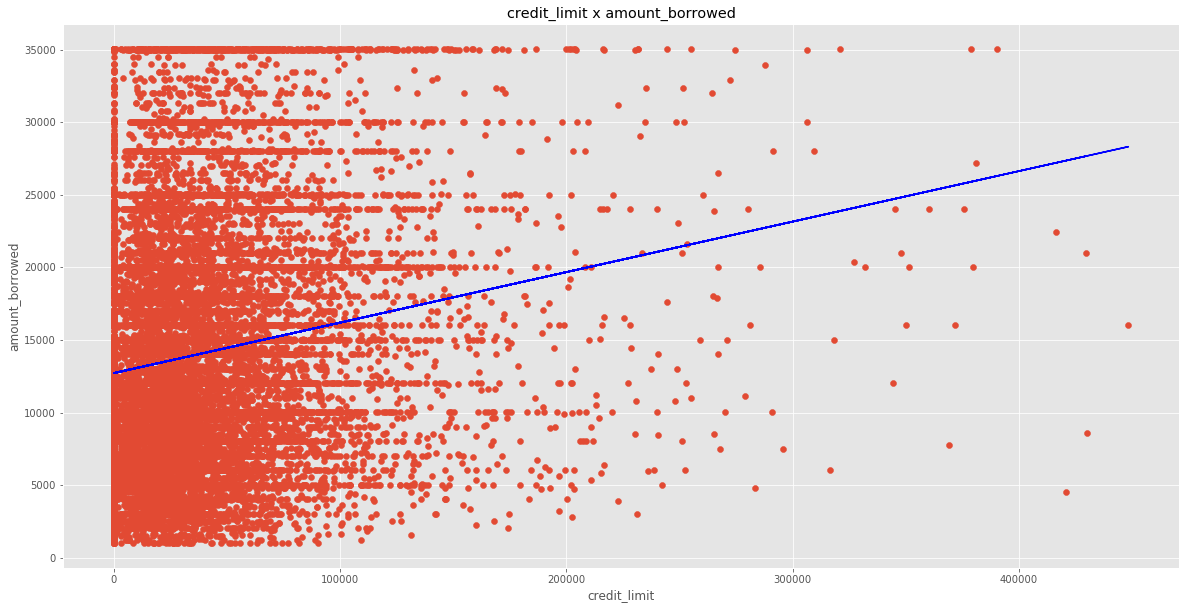

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(creditlimit_list,amountborrowed_list)
plt.plot(creditlimit_list,yrlist,'b')
plt.title('credit_limit x amount_borrowed')
plt.xlabel('credit_limit')
plt.ylabel('amount_borrowed')

In [57]:
pearsonr(creditlimit_list,amountborrowed_list)

(0.16704666509837449, 1.7519157928358911e-114)

### let's look at the scatter plot score_3 x score_4 (for the dataset without the 'income' outlier):

In [58]:
score3_list = list(df_train_num_allclean_income_outlier['score_3'])
score4_list = list(df_train_num_allclean_income_outlier['score_4'])

In [59]:
(c1,c2)=polyfit(score3_list, score4_list, 1)
yr=polyval([c1,c2],score3_list)
yrlist = list(yr)

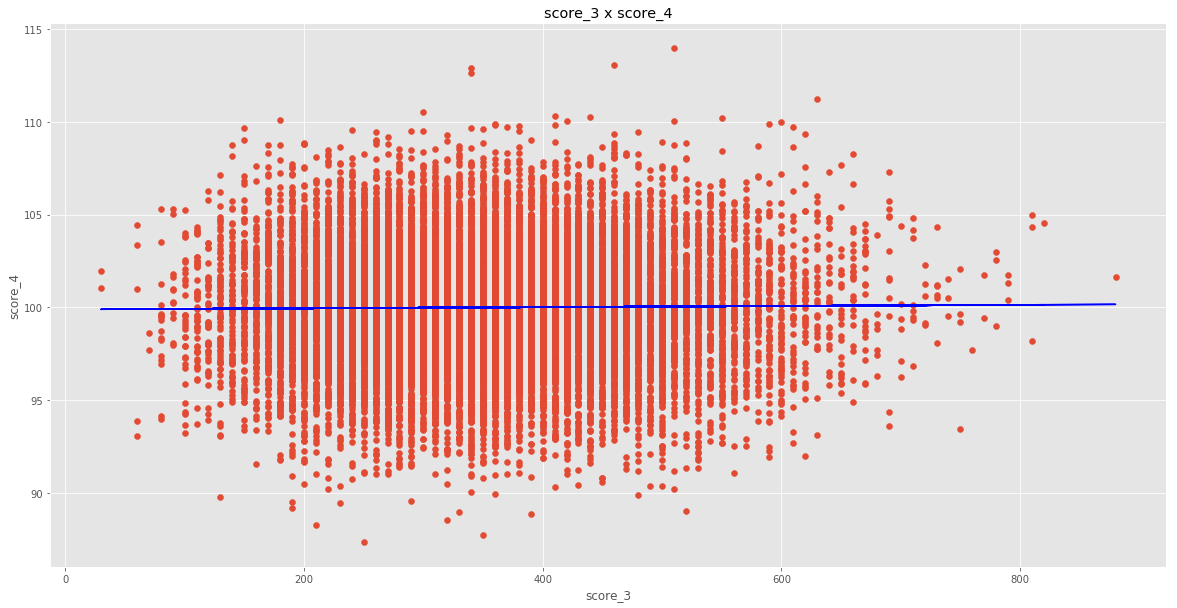

In [60]:
plt.figure(figsize=(20,10))
plt.scatter(score3_list,score4_list)
plt.plot(score3_list,yrlist,'b')
plt.title('score_3 x score_4')
plt.xlabel('score_3')
plt.ylabel('score_4')

In [61]:
df_train_num_allclean

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,0,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0
1,e643bf65-9288-92f2-df13-eed631fe237c,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0
2,8a66ed52-97b1-967f-132c-a5035c130d74,0,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0
3,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,0,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0
4,63ada984-e40a-85f5-1cef-c708be59ef93,0,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0
5,08efdf0f-f8f1-b968-3452-6b634eabf43f,0,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0
6,acbb594c-fdfa-feee-5a57-a21f077bff9b,1,250.0,95.755391,0.555542,98.947427,0.25,14036.89,36.0,9953.0,40013.13,16.0,0.0,0.0,8.0,8.0
7,958fa2a9-6f85-bc5e-4eb2-999b74f34847,0,400.0,102.335198,0.300900,92.746026,0.52,35019.04,36.0,67091.0,95014.57,67.0,0.0,0.0,14.0,14.0
8,ff860c5e-3452-d752-daa2-582180a64802,1,240.0,101.381726,0.849653,90.293183,0.31,35017.06,36.0,41329.0,121020.48,39.0,0.0,0.0,10.0,10.0
9,26a68732-a660-8cf9-340d-34c88ecdcbf0,0,470.0,103.518605,0.082595,102.477202,0.25,18018.63,36.0,34819.0,64032.34,16.0,0.0,0.0,10.0,9.0


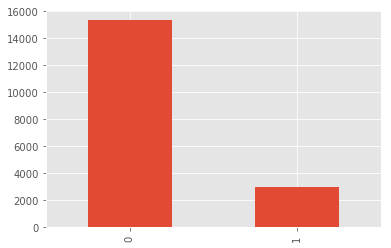

In [62]:
df_train_num_allclean.default.value_counts().plot(kind='bar')

In [63]:
df_d0 = df_train_num_allclean[df_train_num_allclean['default']==0]

In [64]:
len_df_d0 = len(df_d0)
print len_df_d0

15317


In [65]:
df_d0['score_3'].mean()

349.8642031729451

In [66]:
columns_d0 = list_columns_num[2:]

In [67]:
columns_d0

['score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'amount_borrowed',
 'borrowed_in_months',
 'credit_limit',
 'income',
 'ok_since',
 'n_bankruptcies',
 'n_defaulted_loans',
 'n_accounts',
 'n_issues']

In [68]:
average_d0_client = []
for i in xrange(0,len(columns_d0)):
    print df_d0[columns_d0[i]].mean()
    average_d0_client.append(df_d0[columns_d0[i]].mean())
    

349.864203173
100.005830534
0.497402469906
99.9791842173
0.300802376444
13731.8260469
39.4487171117
37478.1370373
78019.1279748
34.8514722204
0.0846771561011
0.0145589867468
11.2728341059
11.2408435072


In [69]:
list(df_d0.iloc[0][2:])

[710.0,
 104.17496075299999,
 0.66150856154399995,
 123.01532541,
 0.42999999999999999,
 20024.310000000001,
 60.0,
 62386.0,
 59869.050000000003,
 14.0,
 1.0,
 0.0,
 9.0,
 9.0]

In [70]:
type(df_d0.iloc[0])

pandas.core.series.Series

In [71]:
def euclidean_dist(a,b):
    diff = np.subtract(a,b)
    return np.linalg.norm(diff)

In [72]:
distances = []
for i in xrange(0,len_df_d0):
    distances.append(euclidean_dist(list(df_d0.iloc[i][2:]),average_d0_client))
    

In [73]:
distances[2]

53985.516136384649

In [74]:
df_d0['distances'] = distances

/home/leandro/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
df_d0

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,distances
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,0,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,59869.05,14.0,1.0,0.0,9.0,9.0,31457.168280
1,e643bf65-9288-92f2-df13-eed631fe237c,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0,16621.667439
2,8a66ed52-97b1-967f-132c-a5035c130d74,0,450.0,96.426992,0.396868,92.619158,0.42,10072.16,36.0,0.0,39335.52,55.0,0.0,0.0,10.0,10.0,53985.516136
3,b8de2a5e-47b2-c03d-7997-0a85d402f9c2,0,450.0,97.793970,0.213243,82.377156,0.42,16016.97,60.0,102018.0,98772.00,17.0,0.0,0.0,13.0,13.0,67832.946129
4,63ada984-e40a-85f5-1cef-c708be59ef93,0,390.0,100.118853,0.123257,83.718723,0.36,11517.24,60.0,0.0,62014.40,49.0,0.0,0.0,6.0,6.0,40812.608566
5,08efdf0f-f8f1-b968-3452-6b634eabf43f,0,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,82310.0,85022.96,43.0,0.0,0.0,19.0,19.0,45428.656576
7,958fa2a9-6f85-bc5e-4eb2-999b74f34847,0,400.0,102.335198,0.300900,92.746026,0.52,35019.04,36.0,67091.0,95014.57,67.0,0.0,0.0,14.0,14.0,40235.752911
9,26a68732-a660-8cf9-340d-34c88ecdcbf0,0,470.0,103.518605,0.082595,102.477202,0.25,18018.63,36.0,34819.0,64032.34,16.0,0.0,0.0,10.0,9.0,14869.188312
10,fd228aa8-5a67-6561-4382-21c35360c01d,0,360.0,102.932536,0.980142,109.162920,0.17,14016.94,36.0,34558.0,65035.38,19.0,0.0,0.0,20.0,20.0,13311.153733
11,9e778a53-626c-8a6a-3ae1-f45b9f246d11,0,370.0,99.223956,0.412439,92.564753,0.27,8065.77,36.0,39315.0,76029.91,21.0,0.0,0.0,12.0,12.0,6279.801807


In [76]:
mean_distance = df_d0['distances'].mean()
print mean_distance

46565.7766709


In [77]:
df_d0['distances'].describe()

count    1.531700e+04
mean     4.656578e+04
std      5.837166e+04
min      1.633464e+03
25%      2.629684e+04
50%      3.861202e+04
75%      5.184364e+04
max      4.922165e+06
Name: distances, dtype: float64

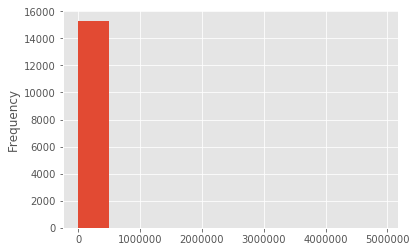

In [78]:
df_d0['distances'].plot.hist( )

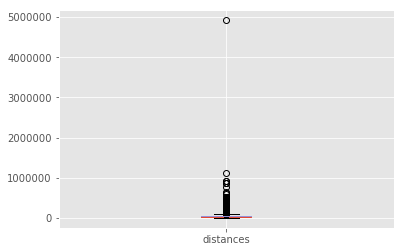

In [79]:
df_d0['distances'].plot.box()

In [80]:
df_d0['distances'].max()

4922165.4190861257

In [81]:
df_d0_outlier = df_d0[df_d0['distances'] != df_d0['distances'].max()]

In [82]:
df_d0_outlier['distances'].describe()

count    1.531600e+04
mean     4.624744e+04
std      4.307207e+04
min      1.633464e+03
25%      2.629498e+04
50%      3.861164e+04
75%      5.184003e+04
max      1.122160e+06
Name: distances, dtype: float64

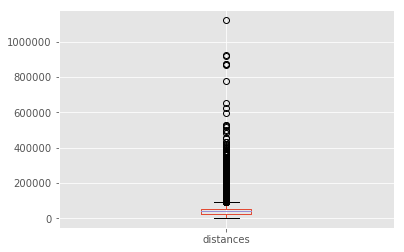

In [83]:
df_d0_outlier['distances'].plot.box()

In [84]:
df_d0_circle = df_d0[df_d0['distances'] < mean_distance/2.0]

In [85]:
len(df_d0_circle)

2978

In [86]:
df_d1 = df_train_num_allclean[df_train_num_allclean['default']==1]

In [87]:
len(df_d1)

2960

In [88]:
df_train_final = pd.concat([df_d0_circle,df_d1],ignore_index=True)

In [89]:
list_columns_num.append('distances')
print list_columns_num

['ids', 'default', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'distances']


In [90]:
df_train_final = df_train_final[list_columns_num]

In [91]:
df_train_final

,ids,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,distances
0,e643bf65-9288-92f2-df13-eed631fe237c,0,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,90026.17,15.0,0.0,0.0,10.0,10.0,16621.667439
1,26a68732-a660-8cf9-340d-34c88ecdcbf0,0,470.0,103.518605,0.082595,102.477202,0.25,18018.63,36.0,34819.0,64032.34,16.0,0.0,0.0,10.0,9.0,14869.188312
2,fd228aa8-5a67-6561-4382-21c35360c01d,0,360.0,102.932536,0.980142,109.162920,0.17,14016.94,36.0,34558.0,65035.38,19.0,0.0,0.0,20.0,20.0,13311.153733
3,9e778a53-626c-8a6a-3ae1-f45b9f246d11,0,370.0,99.223956,0.412439,92.564753,0.27,8065.77,36.0,39315.0,76029.91,21.0,0.0,0.0,12.0,12.0,6279.801807
4,7d1e0751-0234-04ce-f560-a2574e1bb466,0,300.0,102.029271,0.374449,95.887651,0.60,12712.34,60.0,28032.0,60017.90,51.0,0.0,0.0,6.0,6.0,20354.761387
5,222af554-2568-c5b4-f0af-c84779687537,0,380.0,101.933943,0.580816,114.524897,0.24,18022.76,36.0,25336.0,93643.24,3.0,0.0,0.0,4.0,4.0,20247.437809
6,bc637a95-eb17-9083-ed21-367dd8fbf74d,0,180.0,98.783765,0.557186,86.895671,0.49,20010.67,36.0,19946.0,75014.76,30.0,0.0,0.0,11.0,11.0,18864.119368
7,ef2fe94e-ee6e-d341-86b3-d29e2291aad5,0,350.0,102.573450,0.362605,101.166149,0.29,8529.94,36.0,37092.0,87428.07,16.0,0.0,0.0,10.0,10.0,10758.126638
8,16bf0b17-b329-fdc4-0bff-bf4698f289a4,0,300.0,95.825567,0.405883,101.896607,0.25,20008.03,60.0,32865.0,93028.86,33.0,0.0,0.0,8.0,8.0,16910.552311
9,eeff907c-8075-0040-6a03-a882a70da141,0,370.0,107.372882,0.121235,83.520851,0.10,20015.43,36.0,29523.0,60013.63,33.0,0.0,0.0,14.0,14.0,20663.170192


In [92]:
graphlab.canvas.set_target('ipynb')

In [93]:
sf = SFrame(data=df_train_final)

This non-commercial license of GraphLab Create for academic use is assigned to leandro.silva@ufabc.edu.br and will expire on February 16, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1498566876.log


In [94]:
train_data ,test_data = sf.random_split(0.7, seed=1)

In [95]:
train_data

ids,default,score_3,score_4,score_5,score_6,risk_rate
e643bf65-9288-92f2-df13-eed631fe237c ...,0,330.0,103.77463772,0.00285566901607,104.32046202,0.08
9e778a53-626c-8a6a-3ae1-f45b9f246d11 ...,0,370.0,99.2239561245,0.412439467126,92.5647532915,0.27
7d1e0751-0234-04ce-f560-a2574e1bb466 ...,0,300.0,102.029270936,0.374449259046,95.8876507856,0.6
222af554-2568-c5b4-f0af-c84779687537 ...,0,380.0,101.93394325,0.580816454723,114.524897426,0.24
d0eb71da-875a-3d05-3a04-c1029cd2211e ...,0,290.0,96.9284842096,0.367177251207,102.727613787,0.54
5c6cfb78-7dff-1ef5-c27c-9a21b45c1a22 ...,0,370.0,105.483899264,0.744030577534,73.5908216052,0.21
bfe94bc7-07d5-cc27-3f4d-b8c906fea409 ...,0,350.0,99.6515970289,0.308582201343,106.037986386,0.42
d3724a9b-5050-a556-c80f-2f06c48af74a ...,0,290.0,93.2222045094,0.162503761843,114.82154477,0.39
f56dea38-c5d7-cb54-b9a3-3b2be2f8281f ...,0,290.0,94.5176342536,0.550933620972,92.1814160693,0.45
60afaabd-49e1-4f41-4580-804b1a4fc85b ...,0,290.0,99.3417155213,0.0638667148022,107.71339892,0.23


In [96]:
len(train_data[train_data['default']==0])

2071

In [97]:
len(train_data[train_data['default']==1])

2045

In [98]:
len(test_data)

1822

In [99]:
list_columns_num[2:]

['score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'amount_borrowed',
 'borrowed_in_months',
 'credit_limit',
 'income',
 'ok_since',
 'n_bankruptcies',
 'n_defaulted_loans',
 'n_accounts',
 'n_issues',
 'distances']

In [100]:
themodel = graphlab.classifier.create(train_data, target='default',
                                                  features=list_columns_num[2:len(list_columns_num)-1],
                                                  validation_set=test_data)

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 4116

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.021961     | 0.878037          | 0.879802            | 0.533605          | 0.532580            |

| 2         | 0.034139     | 0.881438          | 0.876509            | 0.443751          | 0.445103            |

| 3         | 0.045269     | 0.882896          | 0.881449            | 0.387933          | 0.391019            |

| 4         | 0.056184     | 0.883139          | 0.878156            | 0.351379          | 0.357560            |

| 5         | 0.066169     | 0.886054          | 0.882547            | 0.326444          | 0.333914            |

| 6         | 0.076045     | 0.889699          | 0.883644            | 0.309552          | 0.319974            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 4116

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.012398     | 0.819242          | 0.806806            | 0.428555          | 0.445233            |

| 2         | 0.021249     | 0.883868          | 0.877058            | 0.366786          | 0.373063            |

| 3         | 0.031641     | 0.880952          | 0.878705            | 0.355135          | 0.359239            |

| 4         | 0.041668     | 0.879495          | 0.879802            | 0.351190          | 0.353890            |

| 5         | 0.051244     | 0.879981          | 0.879802            | 0.348325          | 0.351437            |

| 6         | 0.061023     | 0.883139          | 0.880351            | 0.354654          | 0.361883            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 4116

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.013678     | 0.878037          | 0.879802            | 0.533605          | 0.532580            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 4116

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

Number of coefficients    : 15

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 7        | 0.002187  | 0.191215     | 0.494898          | 0.491767            |

| 2         | 9        | 1.000000  | 0.271207     | 0.615403          | 0.627881            |

| 3         | 10       | 1.000000  | 0.344230     | 0.592080          | 0.587267            |

| 4         | 11       | 1.000000  | 0.405448     | 0.631924          | 0.627881            |

| 5         | 12       | 1.000000  | 0.487335     | 0.630952          | 0.622393            |

| 6         | 13       | 1.000000  | 0.547455     | 0.625364          | 0.623491            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

Logistic regression:

--------------------------------------------------------

Number of examples          : 4116

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

Number of coefficients    : 15

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.050605     | 0.646744          | 0.644896            |

| 2         | 3        | 0.119264     | 0.661565          | 0.651482            |

| 3         | 4        | 0.174833     | 0.662293          | 0.652031            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.88803511858
PROGRESS: RandomForestClassifier          : 0.878704726696
PROGRESS: DecisionTreeClassifier          : 0.879802405834
PROGRESS: SVMClassifier                   : 0.635016
PROGRESS: LogisticClassifier              : 0.652031
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [101]:
themodel.evaluate(test_data, metric='auto')

{'accuracy': 0.8880351262349067,
 'auc': 0.9217952657231856,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   35  |
 |      0       |        0        |  872  |
 |      1       |        0        |  169  |
 |      1       |        1        |  746  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.8797169811320754,
 'log_loss': 0.2913303317152465,
 'precision': 0.9551856594110115,
 'recall': 0.8153005464480875,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 915 | 907 |
 |   1e-05   | 1.0 | 1.0 | 915 | 907 |
 |   2e-05   | 1.0 | 1.0 | 91

In [102]:
themodel.show(view='Evaluation')

In [103]:
results = sf.select_columns(list_columns_num)

In [104]:
results['predictions'] = themodel.predict(results, output_type='probability')

In [105]:
results

ids,default,score_3,score_4,score_5,score_6,risk_rate
e643bf65-9288-92f2-df13-eed631fe237c ...,0,330.0,103.77463772,0.00285566901607,104.32046202,0.08
26a68732-a660-8cf9-340d-34c88ecdcbf0 ...,0,470.0,103.518604867,0.0825953142292,102.477202085,0.25
fd228aa8-5a67-6561-4382-21c35360c01d ...,0,360.0,102.932536179,0.980141517176,109.162920206,0.17
9e778a53-626c-8a6a-3ae1-f45b9f246d11 ...,0,370.0,99.2239561245,0.412439467126,92.5647532915,0.27
7d1e0751-0234-04ce-f560-a2574e1bb466 ...,0,300.0,102.029270936,0.374449259046,95.8876507856,0.6
222af554-2568-c5b4-f0af-c84779687537 ...,0,380.0,101.93394325,0.580816454723,114.524897426,0.24
bc637a95-eb17-9083-ed21-367dd8fbf74d ...,0,180.0,98.7837649406,0.557185875062,86.8956707018,0.49
ef2fe94e-ee6e-d341-86b3-d29e2291aad5 ...,0,350.0,102.573450191,0.362604615961,101.166149192,0.29
16bf0b17-b329-fdc4-0bff-bf4698f289a4 ...,0,300.0,95.8255672049,0.405883421253,101.89660672,0.25
eeff907c-8075-0040-6a03-a882a70da141 ...,0,370.0,107.372882082,0.121235402924,83.5208510882,0.1


In [106]:
df_test = SFrame.to_dataframe(test_data)
df_train = SFrame.to_dataframe(train_data)
df_results = SFrame.to_dataframe(results)

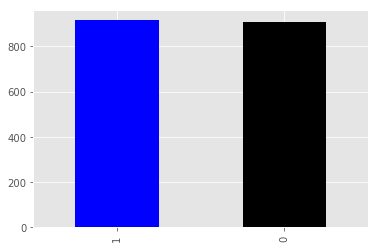

In [107]:
df_test.default.value_counts().plot(kind='bar',color=['b','k'])

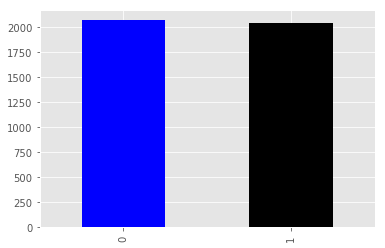

In [108]:
df_train.default.value_counts().plot(kind='bar',color=['b','k'])

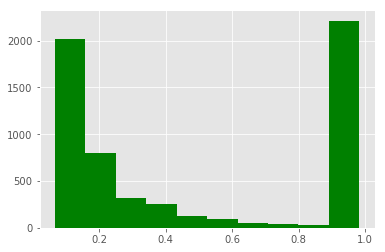

In [109]:
df_results['predictions'].hist(color='g')

In [110]:
df_results['predictions'].describe()

count    5938.000000
mean        0.498814
std         0.383034
min         0.067370
25%         0.140405
50%         0.293601
75%         0.976182
max         0.981736
Name: predictions, dtype: float64